### 准备环境

In [ ]:
# 导入模块
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 设置图表的参数
plt.rcParams['font.family'] = 'Microsoft Yahei'
# 使用unicode_minus参数设置正常显示负号
plt.rcParams['axes.unicode_minus'] = False

### 加载与了解数据

In [ ]:
# 读取数据
df = pd.read_csv('airport-ontime.csv')
df.head()

In [ ]:
# 了解数据基本情况
df.info()

In [ ]:
# 删除无用的列
df.dropna(axis=1,how='all',inplace=True)

In [ ]:
# 查看哪列有缺失值
df.isnull().sum()

In [ ]:
# 查看重复的值
df.duplicated().any()

In [ ]:
# 删除重复的行
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

In [ ]:
df.iloc[:,10:17].head(10)

In [ ]:
# 创建是否有延迟的列
# df['new'] = df.ARR_DEL15.apply(lambda x: 1 if x > 0 else 0)

### 查看起飞和到达延迟总体状况

In [ ]:
# 因为查看起飞延迟数据，发现有缺失值，所以删除缺失值
dep_rs = df.DEP_DEL15.dropna()
dep_rs

In [ ]:
# 统计起飞延迟的次数
dep_rs.value_counts()

In [ ]:
# 根据起飞延迟的次数，绘制饼图
dep_rs.value_counts().plot(kind='pie',labels=['未延迟','延迟'],autopct='%.2f%%',colors=['#9999ff','#ff9999'])

In [ ]:
# 因为查看到达延迟数据，发现有缺失值，所以删除缺失值
arr_rs = df.ARR_DEL15.dropna()
arr_rs

In [ ]:
# 统计到达延迟的次数
arr_rs.value_counts()

In [ ]:
# 根据到达延迟的次数，绘制饼图
arr_rs.value_counts().plot(kind='pie',labels=['未延迟','延迟'],autopct='%.2f%%',colors=['#9999ff','#ff9999'])

### 分析机场飞机延迟数量

In [ ]:
# 获取数据
o_dep_rs = df[['ORIGIN_STATE_ABR','DEP_DEL15']]

In [ ]:
# 判读起飞延迟的数据是否有缺失值
# o_dep_rs.isnull().sum()
# 删除缺失值
o_dep_rs = o_dep_rs.dropna()
o_dep_rs.head()

In [ ]:
# 统计每个州的起飞延迟的次数 AK524 AL641
# o_dep_rs.groupby(['ORIGIN_STATE_ABR','DEP_DEL15'])['DEP_DEL15'].count()
o_dep_dely_count = o_dep_rs.groupby('ORIGIN_STATE_ABR')['DEP_DEL15'].sum()

In [ ]:
# 通过图表显示每个州的起飞延迟的次数
o_dep_dely_count.sort_values(ascending=False).plot(kind='bar',title='每个州的起飞延迟的次数',figsize=(20,8))

In [35]:
# 获取到达数据
o_arr_rs = df[['ORIGIN_STATE_ABR','ARR_DEL15']]

In [36]:
# 判读起飞延迟的数据是否有缺失值
# o_arr_rs.isnull().sum()
# 删除缺失值
o_arr_rs = o_arr_rs.dropna()
o_arr_rs.head()

,ORIGIN_STATE_ABR,ARR_DEL15
0,NY,0.0
1,CA,0.0
3,CA,1.0
4,TX,0.0
5,HI,0.0


In [38]:
# 统计每个州的到达延迟的次数 
o_arr_dely_count = o_arr_rs.groupby('ORIGIN_STATE_ABR')['ARR_DEL15'].sum()

<Axes: title={'center': '每个州的到达延迟的次数'}, xlabel='ORIGIN_STATE_ABR'>

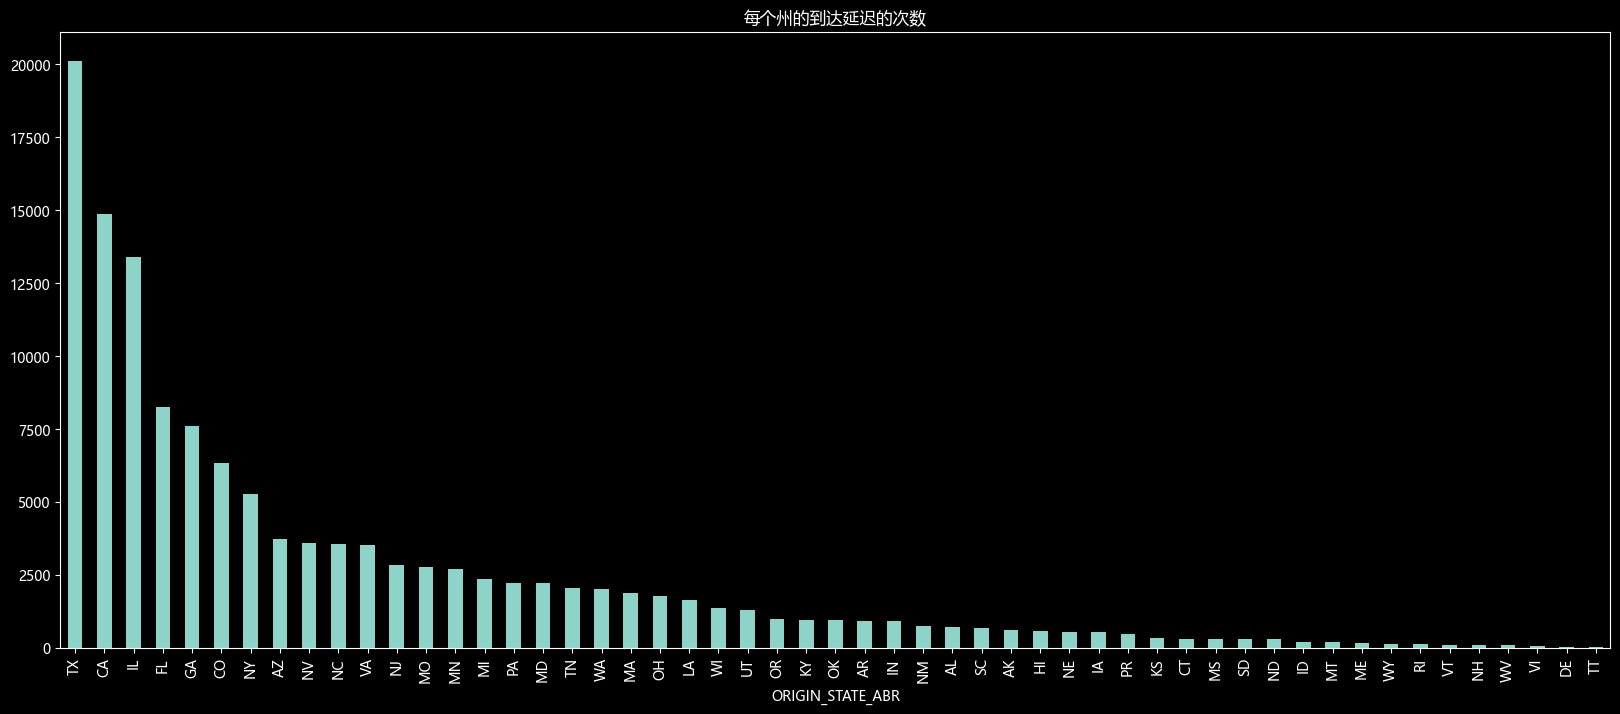

In [40]:
# 通过图表显示每个州的起飞延迟的次数
o_arr_dely_count.sort_values(ascending=False).plot(kind='bar',title='每个州的到达延迟的次数',figsize=(20,8))

In [42]:
# 合并起飞延迟和到达延迟的数据
o_dep_arr_dely_count = pd.DataFrame([o_dep_dely_count,o_arr_dely_count]).T
o_dep_arr_dely_count

,DEP_DEL15,ARR_DEL15
ORIGIN_STATE_ABR,,
AK,524.0,594.0
AL,641.0,722.0
AR,789.0,931.0
AZ,3937.0,3732.0
CA,15955.0,14855.0
CO,6041.0,6331.0
CT,293.0,314.0
DE,19.0,19.0
FL,7861.0,8243.0


<Axes: title={'center': '每个州的起飞延迟和到达延迟的次数'}, xlabel='ORIGIN_STATE_ABR'>

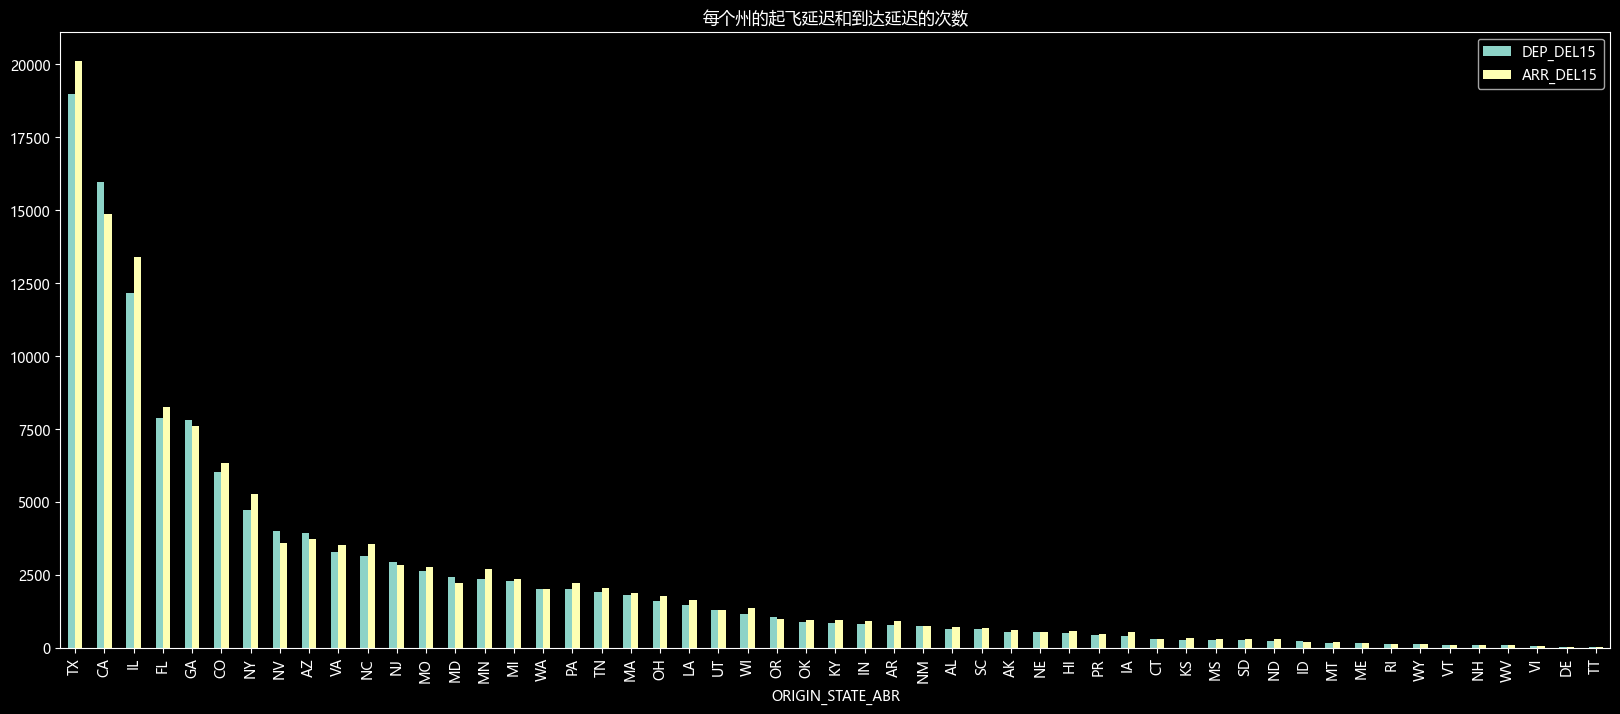

In [43]:
# 根据合并起飞延迟和到达延迟的数据 绘制柱状图
o_dep_arr_dely_count.sort_values(by='DEP_DEL15',ascending=False).plot(kind='bar',title='每个州的起飞延迟和到达延迟的次数',figsize=(20,8))

### 查看机场延迟百分比

In [ ]:
# 获取机场起飞延迟的总次
# o_dep_arr_dely_count['DEP_DEL15']
# 获取机场到达延迟的总次
# o_dep_arr_dely_count['ARR_DEL15']
# 获取起飞航班的总次数
o_dep_count = df[['ORIGIN_STATE_ABR','DEP_DEL15']].dropna()['DEP_DEL15'].count()
o_arr_count = df[['ORIGIN_STATE_ABR','ARR_DEL15']].dropna()['ARR_DEL15'].count()
# 计算起飞延迟的比例
dep_rs_100 = o_dep_arr_dely_count['DEP_DEL15'] / o_dep_count
arr_rs_100 = o_dep_arr_dely_count['ARR_DEL15'] / o_arr_count
# 显示百分比
dep_rs_100.sort_values(ascending=False)
# display(arr_rs_100*100)

In [84]:
# 获取机场起飞延迟的总次
# o_dep_arr_dely_count['DEP_DEL15']
# 获取机场到达延迟的总次
# o_dep_arr_dely_count['ARR_DEL15']
# 获取机场起飞航班的总次数
o_dep_count = df[['ORIGIN_STATE_ABR','DEP_DEL15']].dropna().groupby('ORIGIN_STATE_ABR')['DEP_DEL15'].count()
o_arr_count = df[['ORIGIN_STATE_ABR','ARR_DEL15']].dropna().groupby('ORIGIN_STATE_ABR')['ARR_DEL15'].count()
dep_rs_100 = o_dep_arr_dely_count['DEP_DEL15'] / o_dep_count
arr_rs_100 = o_dep_arr_dely_count['ARR_DEL15'] / o_arr_count
dep_rs_100
arr_rs_100

ORIGIN_STATE_ABR
AK    0.209672
AL    0.360639
AR    0.443968
AZ    0.311052
CA    0.311785
CO    0.344901
CT    0.225575
DE    0.250000
FL    0.323610
GA    0.327182
HI    0.131703
IA    0.364271
ID    0.196597
IL    0.462349
IN    0.325540
KS    0.360440
KY    0.331704
LA    0.365333
MA    0.285605
MD    0.344196
ME    0.270221
MI    0.273887
MN    0.326058
MO    0.358693
MS    0.377335
MT    0.166954
NC    0.351156
ND    0.281071
NE    0.325829
NH    0.215278
NJ    0.364290
NM    0.333943
NV    0.346076
NY    0.332076
OH    0.322198
OK    0.339778
OR    0.221442
PA    0.315574
PR    0.259517
RI    0.186798
SC    0.340112
SD    0.328962
TN    0.352484
TT    0.341463
TX    0.405148
UT    0.183610
VA    0.337891
VI    0.185596
VT    0.325228
WA    0.239212
WI    0.341359
WV    0.358268
WY    0.180263
Name: ARR_DEL15, dtype: float64